## 1. Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

## 2. Data preparation:

In [2]:
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
df = pd.read_csv(url)
df.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### We will use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [5]:
pd.DataFrame(df.columns,index=list(range(1,len(df.columns)+1))).T

,1,2,3,4,5,6,7,8,9,10,11,12
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked


## Here, 2nd column 'Survived' is our target variable. It seems obvious that the columns 'PassenderId', 'Name', 'Ticket', 'E mbarked' and 'Cabin' would not contribute well in predicting whether a passenger survived or not. So, we will drop those columns.

In [6]:
df=df.drop(['PassengerId', "Name", "Ticket", 'Cabin', "E mbarked"],axis=1)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull()['Age'].sum()

177

### Here, we have 177 null values for the feature 'Age'.

## 3. Exploratory Data Analysis:

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [11]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

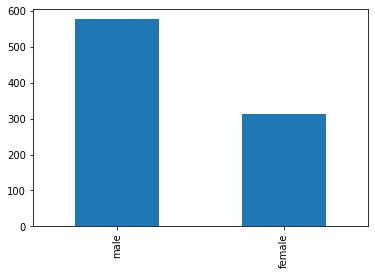

In [12]:
df['Sex'].value_counts().plot(kind='bar')
plt.show()

### Most of the passengers were Males.

In [13]:
df.pivot_table('Survived',index='Sex',margins=True)

,Survived
Sex,
female,0.742038
male,0.188908
All,0.383838


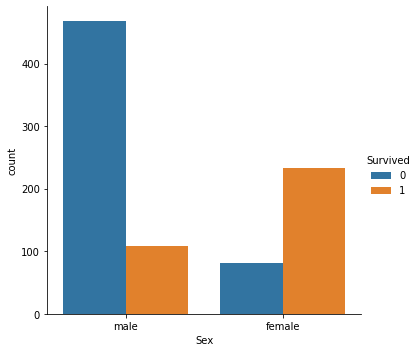

In [14]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = df) 
plt.show()

### About 38% of all passengers survived. About 74% of the females and only 19% of the males survived. Now, lets consider the Pclass also. 

In [15]:
df.pivot_table("Survived",index='Sex',columns='Pclass',margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### Clearly, most passengers who survived were from Class '1', about 63% of those who survived were from class '1', about 74% of those who survived were females and of those who survived, most passengers were females from Class '1'. 

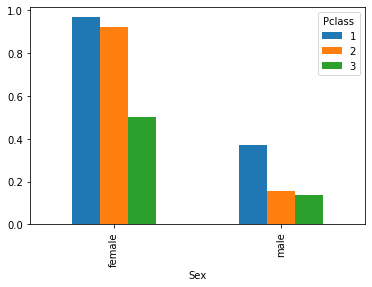

In [16]:
df.pivot_table("Survived",index='Sex',columns='Pclass').plot(kind='bar')
plt.show()

### Till now, we have explored the relationship between the possibility of survival and the sex and class of the passenger. Now, let's explore more of the data.

In [17]:
df.pivot_table("Age",index='Sex',columns='Survived',margins=True)

Survived,0,1,All
Sex,,,
female,25.046875,28.847716,27.915709
male,31.618056,27.276022,30.726645
All,30.626179,28.343690,29.699118


### Now, we have the following findings: 
#### Mean age of all the passengers is about 30 years
#### Mean age of those who did'nt survived is about 31 years
#### Mean age of those who survived is about 28 years
#### Mean age of all females is about 28 years
#### Mean age of females who did'nt survived is about 25 years
#### Mean age of females who survived is about 29 years
#### Mean age of all males is about 31 years
#### Mean age of males who did'nt survived is about 32 years
#### Mean age of males who survived is about 27 years


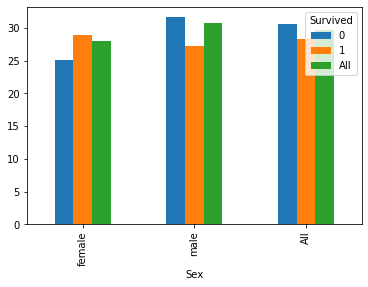

In [18]:
df.pivot_table("Age",index='Sex',columns='Survived',margins=True).plot(kind='bar')
plt.show()

## Let's explore the 'Fare' variable, it is intuitive that if a passenger pays more, he/she is provided with more facilities and is more likely to survive. Now, let's check our intuition statistically. 

In [19]:
df.pivot_table("Fare",index='Survived',aggfunc='mean',margins=True)

,Fare
Survived,
0,22.117887
1,48.395408
All,32.204208


## Passengers who survived pays more than those who died. We can think that paying more should mean buying a first class ticket. Let's explore this.  

In [20]:
df.pivot_table("Fare",index='Survived',columns='Pclass',aggfunc='mean',margins=True)

Pclass,1,2,3,All
Survived,,,,
0,64.684008,19.412328,13.669364,22.117887
1,95.608029,22.055700,13.694887,48.395408
All,84.154687,20.662183,13.675550,32.204208


### Yes, we were true. Most of the passengers who survived paid more. 

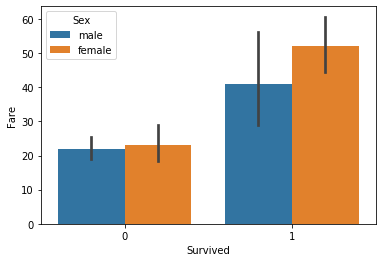

In [21]:
sns.barplot(x='Survived',y='Fare',hue='Sex',data=df)
plt.show()

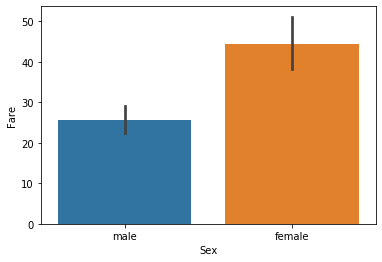

In [22]:
sns.barplot(x='Sex',y='Fare',data=df)
plt.show()

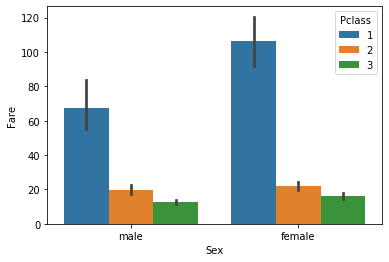

In [23]:
sns.barplot(x='Sex',y='Fare',hue='Pclass',data=df)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


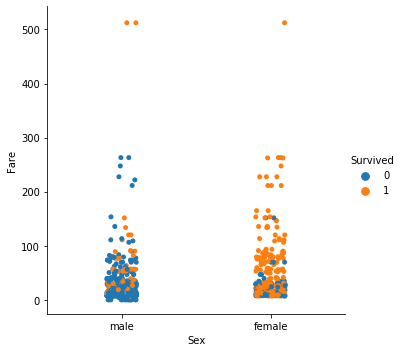

In [24]:
sns.catplot(x='Sex',y='Fare',hue='Survived',split=False, data=df)
plt.show()

## We found that females are more likely to pay more so they are more likely to travel in first class and hence are more likely to survive. 
## Now, lets see how does age of a passenger affects the chances of survival.

In [25]:
df.pivot_table('Age', index='Survived')

,Age
Survived,
0,30.626179
1,28.343690


## It seems that younger passengers survived more.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


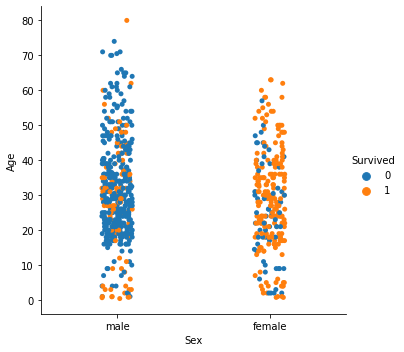

In [26]:
sns.catplot(x='Sex',y='Age',hue='Survived',split=False, data=df)
plt.show()

### Most of the passengers who survived were females. 
### Younger passenger is more likely to survive.

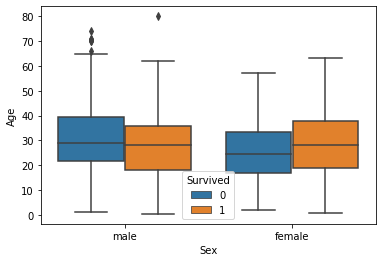

In [27]:
sns.boxplot(x= 'Sex',y='Age',hue='Survived', data=df)
plt.show()

## 4. Modelling:

In [28]:
df['Sex'].head

<bound method NDFrame.head of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [32]:
df_new = pd.get_dummies(df, columns=['Sex'])
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [33]:
df_new.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
dtype: int64

## We have 177 null values for the 'Age' column. Let's impute the missing values in Age column. We will fill the null age value of a passenger according to the class he/she is travelling in. 

In [35]:
df_new.pivot_table('Age',columns='Pclass')

Pclass,1,2,3
Age,38.233441,29.87763,25.14062


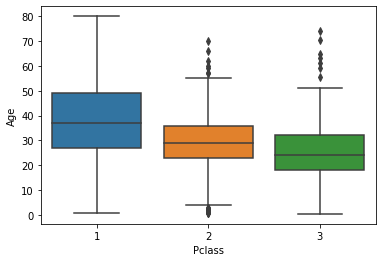

In [36]:
sns.boxplot('Pclass','Age',data=df_new)
plt.show()

In [37]:
# function to get the row-indices for the rows having null values for age
def get_null_age(df):
    age=[]
    Pclass=[]
    null_index=[]
    for i in df.index[df.isnull()['Age']]:
        null_index.append(i)
        age.append(df.loc[i]['Age'])
        Pclass.append(df.loc[i]['Pclass'])
    return pd.DataFrame([age,Pclass],index=['Age','Pclass'],columns=null_index).T

In [38]:
get_null_age(df_new)

,Age,Pclass
5,NaN,3.0
17,NaN,2.0
19,NaN,3.0
26,NaN,3.0
28,NaN,3.0
...,...,...
859,NaN,3.0
863,NaN,3.0
868,NaN,3.0
878,NaN,3.0


In [39]:
df_new.pivot_table('Age',columns='Pclass')

Pclass,1,2,3
Age,38.233441,29.87763,25.14062


In [40]:
#function to fill the null values for 'Age'
def fill_null_age(df):

    for i in df.index[df.isnull()['Age']]:
        if(df.loc[i]['Pclass']==1):
            df['Age'][i]=38
        elif(df.loc[i]['Pclass']==2):
            df['Age'][i]=30
        else:
            df['Age'][i]=25

In [41]:
l=[]
for i in df.index[df.isnull()['Age']]:
    l.append(i)

In [42]:
fill_null_age(df_new)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
get_null_age(df_new)

,Age,Pclass


In [44]:
df_new.isnull()['Age'].sum()

0

## Here, we can see that the null values for 'Age' have been filled. 

## Let's look at the rows that were having null values for "Age" and now have been filled.

In [45]:
df_new.loc[l][:]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
5,0,3,25.0,0,0,8.4583,0,1
17,1,2,30.0,0,0,13.0000,0,1
19,1,3,25.0,0,0,7.2250,1,0
26,0,3,25.0,0,0,7.2250,0,1
28,1,3,25.0,0,0,7.8792,1,0
...,...,...,...,...,...,...,...,...
859,0,3,25.0,0,0,7.2292,0,1
863,0,3,25.0,8,2,69.5500,1,0
868,0,3,25.0,0,0,9.5000,0,1
878,0,3,25.0,0,0,7.8958,0,1


### Now, we can proceed.

In [46]:
X=df_new.drop('Survived',axis=1)
y=df_new['Survived']

In [47]:
print(df_new.shape)
print(X.shape)
print(y.shape)

(891, 8)
(891, 7)
(891,)


In [48]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=.25,random_state=22)

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(668, 7)
(668,)
(223, 7)
(223,)


In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
clf.score(X_train,y_train)

0.9850299401197605

In [52]:
clf.score(X_test,y_test)

0.7713004484304933

## This is the base model accuracy which is 77.13%. Now, we will try to improve the accuracy.

In [53]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_transform = scalar.fit_transform(X)

In [54]:
X_train, X_test, y_train,y_test=train_test_split(X_transform,y,test_size=.25,random_state=22)

In [55]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
clf.score(X_train,y_train)

0.9850299401197605

In [57]:
clf.score(X_test,y_test)

0.7757847533632287

### Using Principal Component Analysis:

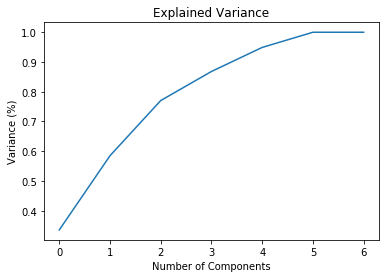

In [58]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
p_components = pca.fit_transform(X_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

Around 90% of the variance is being explained by 4 components.

In [59]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(X_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])

In [60]:
principal_x

,PC-1,PC-2,PC-3,PC-4
0,-1.206455,-0.969334,0.274281,0.229601
1,2.042369,1.494497,-0.460101,0.134773
2,0.992354,-0.687552,-1.862868,0.063073
3,1.941459,1.226037,-0.602234,0.145958
4,-1.488009,-0.123359,-0.266043,-0.338791
...,...,...,...,...
886,-1.171670,0.307792,0.030231,0.344800
887,1.656532,0.652199,-1.208797,1.023444
888,2.169040,-1.490246,-0.160762,-0.966508
889,-0.814314,1.130263,0.396577,0.734712


In [61]:
# let's fit the model again to the new transformed data
X_train, X_test, y_train,y_test=train_test_split(principal_x,y,test_size=.25,random_state=22)
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7219730941704036

### Here, the accuracy has decreased to 72.19% on using 4 features from 77.13%(when we used all features). So, we have to use all features in our model. 
### Now, lets try to tune the hyperparameters. 

In [72]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best','random'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'max_features': [4,5,6],
    'min_samples_split': range(2,10,1),
    
}

In [73]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)

In [74]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=2,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1000,
                                              splitter='random'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         

In [75]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'random'}

In [111]:
clf=DecisionTreeClassifier(random_state=22,criterion='entropy',max_depth=7,max_features=4,min_samples_leaf=1,min_samples_split=4,splitter='random')

In [112]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='random')

In [113]:
clf.score(X_test,y_test)

0.7937219730941704

### Here, the accuracy has increased to 79.37% from 77.13% after tuning the hyperparameters.

In [143]:
clf=DecisionTreeClassifier(random_state=375,criterion='entropy',max_depth=7,max_features=4,min_samples_leaf=1,min_samples_split=4,splitter='random')

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8116591928251121

### Here, the accuracy has further increased to 81.17% from 77.13% after fixing the random state.

In [144]:
df_new.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
5,0,3,25.0,0,0,8.4583,0,1
6,0,1,54.0,0,0,51.8625,0,1
7,0,3,2.0,3,1,21.0750,0,1
8,1,3,27.0,0,2,11.1333,1,0
9,1,2,14.0,1,0,30.0708,1,0


## Let's create a new feature for total number of family members aboard of a passenger.

In [145]:
df_new['Famliy_members']=1+df_new['SibSp']+df_new['Parch']

In [205]:
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Famliy_members
0,0,3,22.0,1,0,7.2500,0,1,2
1,1,1,38.0,1,0,71.2833,1,0,2
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,2
4,0,3,35.0,0,0,8.0500,0,1,1


In [206]:
X=df_new.drop('Survived',axis=1)
y=df_new['Survived']

In [157]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=.25,random_state=22)

In [204]:
clf=DecisionTreeClassifier(random_state=443,criterion='entropy',max_depth=7,max_features=4,min_samples_leaf=1,min_samples_split=4,splitter='random')

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7847533632286996

### Let's tune the hyperparameters

In [208]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best','random'],
    'max_depth' : range(20,50,5),
    'min_samples_leaf' : range(1,10,1),
    'max_features': [4,5,6],
    'min_samples_split': range(2,10,1),
    
}

In [209]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)

In [210]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy', max_depth=15,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=2,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1000,
                                              splitter='random'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [211]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'splitter': 'best'}

In [232]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=20,max_features=4,min_samples_leaf=3,min_samples_split=7,splitter='best')

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8295964125560538

In [233]:
clf=DecisionTreeClassifier(random_state=234,criterion='entropy',max_depth=20,max_features=4,min_samples_leaf=3,min_samples_split=7,splitter='best')

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.820627802690583

In [258]:
clf=DecisionTreeClassifier(random_state=2341,criterion='entropy',max_depth=20,max_features=4,min_samples_leaf=3,min_samples_split=7,splitter='best')

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8295964125560538

## Now, we are getting an accuracy of 82.96% which is quite good. 